### 1) Import Libraries and Load Data

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical data for US 10Y Treasury and S&P 500
ticker_10y = '^TNX'
ticker_sp500 = '^GSPC'

# Set dates for data fetching
start_date = '2000-01-01'
#end_date =

# Download data
data_10y = yf.download(ticker_10y, start=start_date)
data_sp500 = yf.download(ticker_sp500,start=start_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 2) Basic Exploratory Data  Analysis

In [6]:
print(data_10y.head())
print(data_sp500.head())

print(data_sp500.describe())
print(data_10y.describe())

Price       Close   High    Low   Open Volume
Ticker       ^TNX   ^TNX   ^TNX   ^TNX   ^TNX
Date                                         
2000-01-03  6.548  6.603  6.498  6.498      0
2000-01-04  6.485  6.548  6.485  6.530      0
2000-01-05  6.599  6.599  6.508  6.521      0
2000-01-06  6.549  6.585  6.540  6.558      0
2000-01-07  6.504  6.595  6.504  6.545      0
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000
Price         Close         High

### 2.1) Visualization

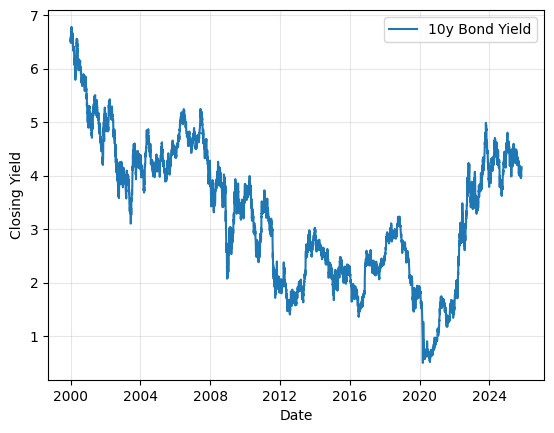

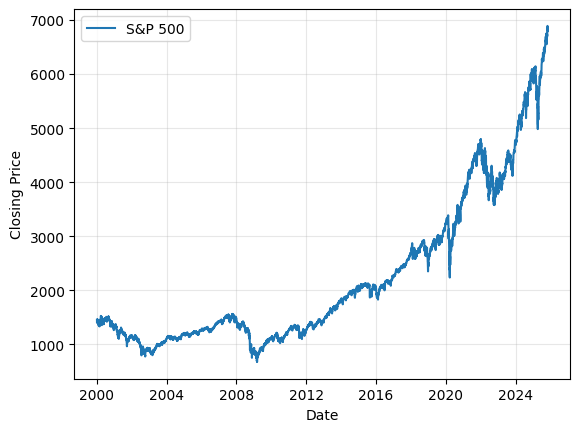

In [8]:
plt.plot(data_10y.index, data_10y['Close'], label = '10y Bond Yield')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Yield')
plt.grid(linestyle='-', alpha=0.3)
plt.show()

plt.plot(data_sp500.index, data_sp500['Close'], label = 'S&P 500')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(linestyle='-', alpha=0.3)
plt.show()

### 2.2) Correlation of returns

In [11]:
# Take log returns for S&P 500 and simple differences for Bond Yields
sp500_log = np.log(data_sp500['Close']).diff()
t10y_diff = data_10y['Close'].diff()

# Concatenate
ret = pd.concat([sp500_log, t10y_diff], axis=1)

# Compute correlation
ret.corr()
print(ret.corr())

Ticker   ^GSPC    ^TNX
Ticker                
^GSPC   1.0000  0.2845
^TNX    0.2845  1.0000


### 3) Data Preparation and Cleaning

In [30]:
#Extract closing prices
closing_prices_10y = data_10y['Close']
closing_prices_sp500 = data_sp500['Close']

# Since they are Pandas DataFrames, convert to Series
closing_prices_10y = closing_prices_10y.iloc[:, 0]
closing_prices_sp500 = closing_prices_sp500.iloc[:, 0]

# Align the data by date index
combined_data = pd.DataFrame({
    '10Y_Treasury': closing_prices_10y,
    'SP500': closing_prices_sp500
})

# Remove missing values
combined_data_clean = combined_data.dropna()

# Calculate daily returns (percentage changes)
daily_returns_10y = combined_data_clean['10Y_Treasury'].pct_change()
daily_returns_sp500 = combined_data_clean['SP500'].diff()

# Remove the first row NaN
daily_returns_10y_clean = daily_returns_10y.dropna()
daily_returns_sp500_clean = daily_returns_sp500.dropna()

# Combine returns into DataFrame
returns_data = pd.DataFrame({
    '10Y_Returns': daily_returns_10y_clean,
    'SP500_Returns': daily_returns_sp500_clean
})

print(f"\nFinal returns data shape: {returns_data.shape}")
print(returns_data.head())


Final returns data shape: (6493, 2)
            10Y_Returns  SP500_Returns
Date                                  
2000-01-04    -0.009621     -55.799927
2000-01-05     0.017579       2.689941
2000-01-06    -0.007577       1.339966
2000-01-07    -0.006871      38.020020
2000-01-10     0.008303      16.130005
